In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

import renormalization as rg

# Initiate a PottsRenormalizationGroup object

In [2]:
q = 2
potts = rg.PottsRenormalizationGroup(q)

# Metastable droplets

## Varying Potts state q

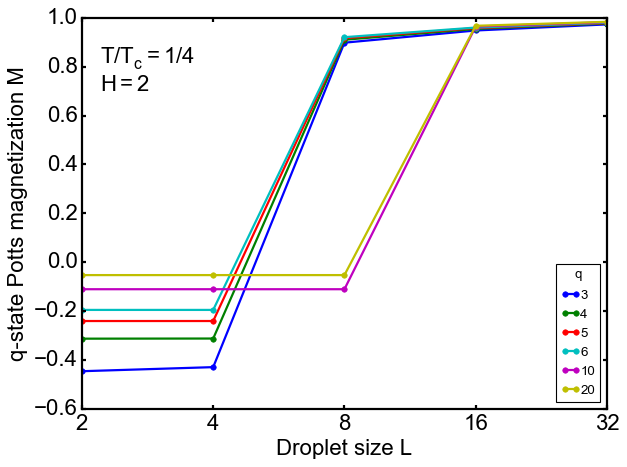

In [10]:
lw = 2
fs = 20
fig = plt.figure(figsize=(8, 6), layout='tight')
fig.set_facecolor('none')
plt.style.use('classic')
plt.rc('lines', linewidth=lw)
plt.rc('axes', linewidth=lw)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams.update({'mathtext.default':'regular'})
ax = plt.subplot(111)

# Constant parameters
h = 2
r = 4 # Tc/T ratio

# Varying parameter
q_values = [3, 4, 5, 6, 10, 20]

for i, q in enumerate(q_values):
    potts = rg.PottsRenormalizationGroup(q)
    j = r * potts.Jc
    droplet = potts.droplet(j, h, iteration=5)
    ax.plot(droplet[0], droplet[1], marker='.', ms=10, label=f"{q}")

ax.text(2.2, 0.7, f"$T/T_c=1/{r}$\n$H={h}$", fontsize=fs)
ax.legend(loc=4, ncol=1, prop={'size':fs - 8}, title="$q$",
          labelspacing=0.5, handlelength=1.4, handletextpad=0)
ax.tick_params(axis="both", direction="in", left=True, width=lw, length=4, labelsize=fs)
ax.set_xlabel("Droplet size L", fontsize=fs)
ax.set_ylabel("q-state Potts magnetization M", fontsize=fs)
ax.set_xscale('log', base=2)
ax.xaxis.set_major_formatter(ScalarFormatter())
#plt.xlim(0.0, 2**7)
plt.show()

## Varying magnetic field H

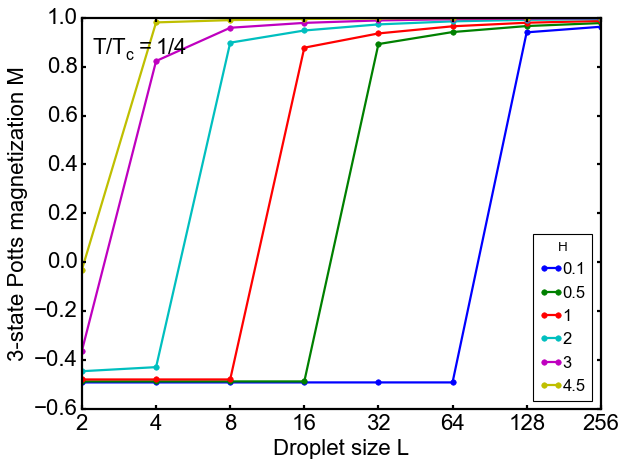

In [9]:
lw = 2
fs = 20
fig = plt.figure(figsize=(8, 6), layout='tight')
fig.set_facecolor('none')
plt.style.use('classic')
plt.rc('lines', linewidth=lw)
plt.rc('axes', linewidth=lw)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams.update({'mathtext.default':'regular'})
ax = plt.subplot(111)

# Constant parameters
q = 3
r = 4 # Tc/T ratio

# Varying parameters
h_values = [0.1, 0.5, 1, 2, 3, 4.5]

# Initiate Potts system
potts = rg.PottsRenormalizationGroup(q)

for i, h in enumerate(h_values):
    j = r * potts.Jc
    droplet = potts.droplet(j, h, iteration=8)
    ax.plot(droplet[0], droplet[1], marker='.', ms=10, label=f"{h}")

ax.text(2.2, 0.85, f"$T/T_c=1/{r}$", fontsize=fs)
ax.legend(loc=4, ncol=1, prop={'size':fs - 5}, title="$H$",
          labelspacing=0.5, handlelength=1.4, handletextpad=0)
ax.tick_params(axis="both", direction="in", left=True, width=lw, length=4, labelsize=fs)
ax.set_xlabel("Droplet size L", fontsize=fs)
ax.set_ylabel(f"{q}-state Potts magnetization M", fontsize=fs)
ax.set_xscale('log', base=2)
ax.xaxis.set_major_formatter(ScalarFormatter())
#plt.xlim(0.0, 2**7)
plt.show()

# Hysteresis loops

## Varying droplet size L

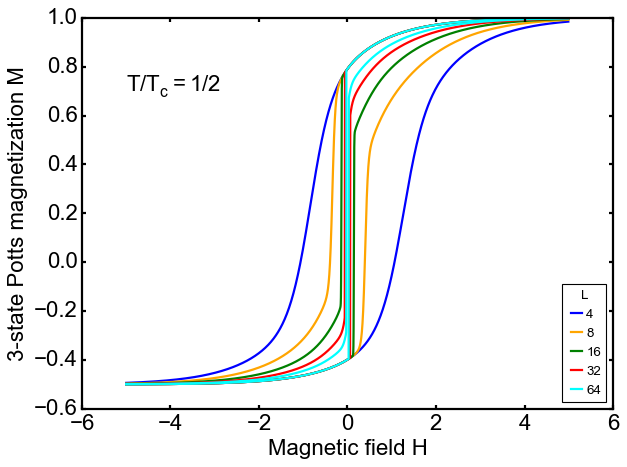

In [11]:
lw = 2
fs = 20
fig = plt.figure(figsize=(8, 6), layout='tight')
fig.set_facecolor('none')
plt.style.use('classic')
plt.rc('lines', linewidth=lw)
plt.rc('axes', linewidth=lw)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams.update({'mathtext.default':'regular'})
ax = plt.subplot(111)

colors = ['blue', 'orange', 'green', 'red', 'cyan', 'black']

# Constant parameters
q = 3
r = 2 # Tc/T ratio

# Varying parameters
h_range = (-5, 5)
L_values = [4, 8, 16, 32, 64]

# Initiate Potts system
potts = rg.PottsRenormalizationGroup(q)

for i, L in enumerate(L_values):
    j = r * potts.Jc
    loop = potts.hysteresis(j, L, h_range)
    ax.plot(loop[0][0], loop[2][0], c=colors[i], label=f"{L}")
    ax.plot(loop[0][1], loop[2][1], c=colors[i])

ax.text(h_range[0], 0.85, f"$T/T_c=1/{r}$", fontsize=fs)
ax.legend(loc=4, ncol=1, prop={'size':fs - 8}, title="$L$",
          labelspacing=0.5, handlelength=1.4, handletextpad=0)
ax.tick_params(axis="both", direction="in", left=True, width=lw, length=4, labelsize=fs)
ax.set_xlabel("Magnetic field H", fontsize=fs)
ax.set_ylabel(f"{q}-state Potts magnetization M", fontsize=fs)
plt.show()

## Varying temperature T/Tc

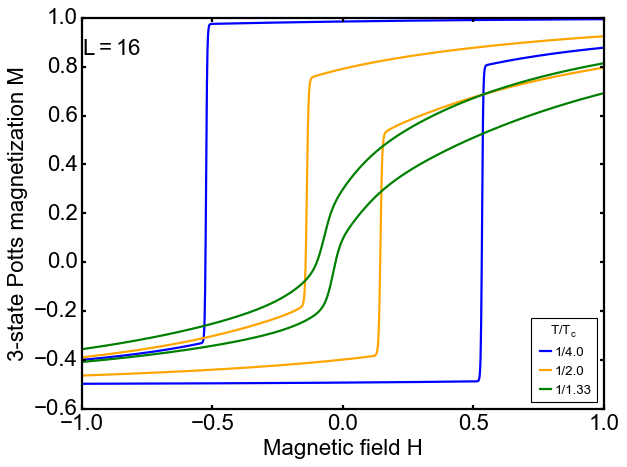

In [17]:
lw = 2
fs = 20
fig = plt.figure(figsize=(8, 6), layout='tight')
fig.set_facecolor('none')
plt.style.use('classic')
plt.rc('lines', linewidth=lw)
plt.rc('axes', linewidth=lw)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams.update({'mathtext.default':'regular'})
ax = plt.subplot(111)

colors = ['blue', 'orange', 'green', 'red', 'cyan', 'black']

# Constant parameters
q = 3
L = 16

# Varying parameters
h_range = (-1, 1)
r_values = [4/1, 4/2, 4/3]
j_values = [r * potts.Jc for r in r_values]

# Initiate Potts system
potts = rg.PottsRenormalizationGroup(q)

for i, j in enumerate(j_values):
    loop = potts.hysteresis(j, L, h_range)
    ax.plot(loop[0][0], loop[2][0], c=colors[i], label=f"1/{round(r_values[i], 2)}")
    ax.plot(loop[0][1], loop[2][1], c=colors[i])

ax.text(h_range[0], 0.85, f"$L={L}$", fontsize=fs)
ax.legend(loc=4, ncol=1, prop={'size':fs - 8}, title="$T/T_c$",
          labelspacing=0.5, handlelength=1.4, handletextpad=0)
ax.tick_params(axis="both", direction="in", left=True, width=lw, length=4, labelsize=fs)
ax.set_xlabel("Magnetic field H", fontsize=fs)
ax.set_ylabel(f"{q}-state Potts magnetization M", fontsize=fs)
plt.show()

## Varying Potts state q

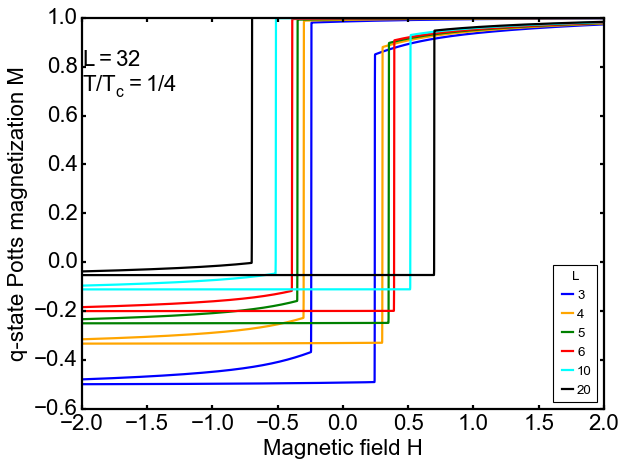

In [19]:
lw = 2
fs = 20
fig = plt.figure(figsize=(8, 6), layout='tight')
fig.set_facecolor('none')
plt.style.use('classic')
plt.rc('lines', linewidth=lw)
plt.rc('axes', linewidth=lw)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams.update({'mathtext.default':'regular'})
ax = plt.subplot(111)

colors = ['blue', 'orange', 'green', 'red', 'cyan', 'black']

# Constant parameters
L = 32
r = 4 # Tc/T ratio

# Varying parameters
h_range = (-2, 2)
q_values = [3, 4, 5, 6, 10, 20]

for i, q in enumerate(q_values):
    potts = rg.PottsRenormalizationGroup(q)
    j = r * potts.Jc
    loop = potts.hysteresis(j, L, h_range)
    ax.plot(loop[0][0], loop[2][0], c=colors[i], label=f"{q}")
    ax.plot(loop[0][1], loop[2][1], c=colors[i])

ax.text(h_range[0], 0.7, f"$L={L}$\n$T/T_c=1/{r}$", fontsize=fs)
ax.legend(loc=4, ncol=1, prop={'size':fs - 8}, title="$L$",
          labelspacing=0.5, handlelength=1.4, handletextpad=0)
ax.tick_params(axis="both", direction="in", left=True, width=lw, length=4, labelsize=fs)
ax.set_xlabel("Magnetic field H", fontsize=fs)
ax.set_ylabel("q-state Potts magnetization M", fontsize=fs)
plt.show()

# q-state Potts densities

In [ ]:
lw = 2
fs = 20
fig = plt.figure(figsize=(8, 6), layout='tight')
fig.set_facecolor('none')
plt.style.use('classic')
plt.rc('lines', linewidth=lw)
plt.rc('axes', linewidth=lw)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams.update({'mathtext.default':'regular'})
ax = plt.subplot(111)

colors = ['blue', 'orange', 'green', 'red', 'cyan', 'black']

# Constant parameters
q = 3
r = 2 # Tc/T ratio

# Varying parameters
h_range = (-3, 3)
L_values = [4, 8, 16, 32]

# Initiate Potts system
potts = rg.PottsRenormalizationGroup(q)
j = r * potts.Jc

for i, L in enumerate(L_values):
    
    loop = potts.hysteresis(j, L, h_range)
    ax.plot(loop[0][0], loop[1][0], c=colors[i], label=f"{L}")
    ax.plot(loop[0][1], loop[1][1], c=colors[i])

ax.text(h_range[0], 0.85, f"$T/T_c=1/{r}$", fontsize=fs)
ax.legend(loc=8, ncol=1, prop={'size':fs - 8}, title="$L$",
          labelspacing=0.5, handlelength=1.4, handletextpad=0)
ax.tick_params(axis="both", direction="in", left=True, width=lw, length=4, labelsize=fs)
ax.set_xlabel("Magnetic field H", fontsize=fs)
#ax.set_ylabel(f"{q}-state Potts density $<\delta(s_i s_j) >$", fontsize=fs)
plt.show()